<a href="https://colab.research.google.com/github/mmmylj/colab_DL/blob/master/TF_Saver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据shape： (55000, 784)


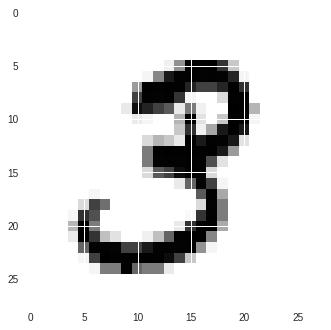

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print ('输入数据:', mnist.train.images)
print ("输入数据shape：", mnist.train.images.shape)
im = mnist.train.images[1]
im = im.reshape(-1,28)
plt.imshow(im)
plt.show()

In [15]:
print ("测试数据集shape：", mnist.test.images.shape)
print ("验证数据集shape：", mnist.validation.images.shape)

测试数据集shape： (10000, 784)
验证数据集shape： (5000, 784)


In [0]:
#forward
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 784]) #28*28=784
y = tf.placeholder(tf.float32, [10])
w = tf.Variable(tf.random_normal(([784,10])))
b = tf.Variable(tf.zeros[10])
pred = tf.nn.softmax(tf.matmul(x, w) + b)

#backward
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
training_epochs = 25
batch_size = 100
display_step = 1

#run Session
with tf.Session() as sess:
    #initial variable
    sess.run(tf.global_variables_initializer())
    #begain train
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _,y = sess.run([optimizer, cost], feed_dict={x:batch_xs, y:batch_ys})
            avg_cost += c/total_batch
        if (epoch+1) % display_batch == 0:
            print ("Epoch:", '%04d',%(epoch+1), "Cost=", "{:.9f}".format(avg_cost))
    print("Finished!")
            